# Binary Image Classifier | Surprise-Neutral

This aim of this project is to train deep learning models using the TensorFlow framework for the purpose of binary image classification for facial emotion recognition. The images used to train the models were retrieved from the __FER2013 dataset__ and the deep learning architecture used to build the models is __Convolutional Neural Network__. Seven different models were trained with a varying number of layers.
The emotions used on this image classifier are __surprise__ and __neutral__. 

In [1]:
import tensorflow as tf
import os

import cv2
import imghdr
import pandas
import pathlib

import numpy as np
import PIL
from matplotlib import pyplot as plt

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [136]:
data_dir = "data/train"
os.listdir(data_dir)

['surprise', 'neutral']

In [137]:
#Data count

data_path = pathlib.Path(data_dir)

image_count = len(list(data_path.glob('*/*.jpg')))
surprise_image_count = len(list(data_path.glob('surprise/*.jpg')))
neutral_image_count = len(list(data_path.glob('neutral/*.jpg')))
print("surprise: ", surprise_image_count, "|", "Neutral: ", neutral_image_count)

surprise:  3171 | Neutral:  4965


In [138]:
print("Total number of training images: ", image_count)

Total number of training images:  8136


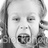

In [139]:
surprise = list(data_path.glob('surprise/*'))
PIL.Image.open(str(surprise[2]))

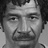

In [140]:
neutral = list(data_path.glob('neutral/*'))
PIL.Image.open(str(neutral[4]))

### Load Data

In [141]:
data = tf.keras.utils.image_dataset_from_directory(data_dir, batch_size=16)

Found 8136 files belonging to 2 classes.


In [142]:
data_iterator = data.as_numpy_iterator()

In [143]:
batch = data_iterator.next()

In [144]:
batch[0].shape

(16, 256, 256, 3)

In [145]:
class_names = data.class_names
print(class_names)

['neutral', 'surprise']


### Data Visualisation

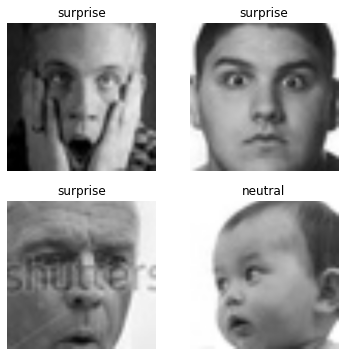

In [146]:
plt.figure(figsize=(6, 6))
for images, labels in data.take(1):
  for i in range(4):
    ax = plt.subplot(2, 2, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")


### Scaling the data

In [147]:
data = data.map(lambda x,y: (x/255, y))

In [148]:
batchh = data.as_numpy_iterator().next()

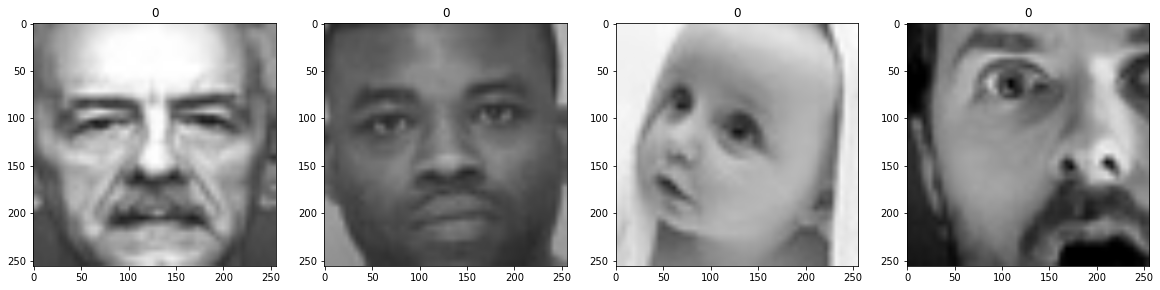

In [149]:
# Visualising the scaled data

fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batchh[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])
    

### Splitting the data

In [150]:
# number of batches
len(data)

509

In [21]:
train_size = int(len(data)*.8) # 80% of data for training
val_size = int(len(data)*.2)+1 # 20% of data for validation

In [22]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)

In [23]:
len(train)

407

In [24]:
len(val)

102

### Building the deep learning model

#### 2 Layers

In [25]:
mod_2 = Sequential()

mod_2.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
mod_2.add(MaxPooling2D())

mod_2.add(Conv2D(32, (3,3), 1, activation='relu'))
mod_2.add(MaxPooling2D())

mod_2.add(Flatten())

mod_2.add(Dense(256, activation='relu'))
mod_2.add(Dense(1, activation='sigmoid'))

In [26]:
mod_2.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [27]:
mod_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 123008)            0         
                                                                 
 dense (Dense)               (None, 256)               3

#### 3 Layers

In [28]:
mod_3 = Sequential()

mod_3.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
mod_3.add(MaxPooling2D())

mod_3.add(Conv2D(32, (3,3), 1, activation='relu'))
mod_3.add(MaxPooling2D())

mod_3.add(Conv2D(16, (3,3), 1, activation='relu'))
mod_3.add(MaxPooling2D())

mod_3.add(Flatten())

mod_3.add(Dense(256, activation='relu'))
mod_3.add(Dense(1, activation='sigmoid'))

In [29]:
mod_3.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [30]:
mod_3.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 30, 30, 16)      

#### 4 Layers

In [31]:
mod_4 = Sequential()

mod_4.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
mod_4.add(MaxPooling2D())

mod_4.add(Conv2D(32, (3,3), 1, activation='relu'))
mod_4.add(MaxPooling2D())

mod_4.add(Conv2D(32, (3,3), 1, activation='relu'))
mod_4.add(MaxPooling2D())

mod_4.add(Conv2D(16, (3,3), 1, activation='relu'))
mod_4.add(MaxPooling2D())

mod_4.add(Flatten())

mod_4.add(Dense(256, activation='relu'))
mod_4.add(Dense(1, activation='sigmoid'))

In [32]:
mod_4.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [33]:
mod_4.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 60, 60, 32)        9248      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 30, 30, 32)      

#### 5 Layers

In [34]:
mod_5 = Sequential()

mod_5.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
mod_5.add(MaxPooling2D())

mod_5.add(Conv2D(16, (3,3), 1, activation='relu'))
mod_5.add(MaxPooling2D())

mod_5.add(Conv2D(32, (3,3), 1, activation='relu'))
mod_5.add(MaxPooling2D())

mod_5.add(Conv2D(32, (3,3), 1, activation='relu'))
mod_5.add(MaxPooling2D())

mod_5.add(Conv2D(16, (3,3), 1, activation='relu'))
mod_5.add(MaxPooling2D())

mod_5.add(Flatten())

mod_5.add(Dense(256, activation='relu'))
mod_5.add(Dense(1, activation='sigmoid'))

In [35]:
mod_5.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [36]:
mod_5.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 125, 125, 16)      2320      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 62, 62, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 60, 60, 32)        4640      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 30, 30, 32)      

#### Training the model

In [37]:
logdir='logs'

In [38]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [39]:
hist_2 = mod_2.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
407/407 [==============================] - 153s 373ms/step - loss: 0.6628 - accuracy: 0.7417 - val_loss: 0.4695 - val_accuracy: 0.7888
Epoch 2/20
407/407 [==============================] - 153s 375ms/step - loss: 0.4369 - accuracy: 0.8096 - val_loss: 0.4474 - val_accuracy: 0.7833
Epoch 3/20
407/407 [==============================] - 158s 388ms/step - loss: 0.3786 - accuracy: 0.8464 - val_loss: 0.4224 - val_accuracy: 0.7986
Epoch 4/20
407/407 [==============================] - 156s 384ms/step - loss: 0.2912 - accuracy: 0.8887 - val_loss: 0.3833 - val_accuracy: 0.8405
Epoch 5/20
407/407 [==============================] - 142s 350ms/step - loss: 0.1858 - accuracy: 0.9323 - val_loss: 0.3915 - val_accuracy: 0.8424
Epoch 6/20
407/407 [==============================] - 154s 378ms/step - loss: 0.1082 - accuracy: 0.9631 - val_loss: 0.4820 - val_accuracy: 0.8510
Epoch 7/20
407/407 [==============================] - 146s 358ms/step - loss: 0.0560 - accuracy: 0.9834 - val_loss: 0.6174 -

In [40]:
hist_3 = mod_3.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
407/407 [==============================] - 120s 293ms/step - loss: 0.5327 - accuracy: 0.7566 - val_loss: 0.4567 - val_accuracy: 0.7925
Epoch 2/20
407/407 [==============================] - 121s 298ms/step - loss: 0.4420 - accuracy: 0.8064 - val_loss: 0.4269 - val_accuracy: 0.8079
Epoch 3/20
407/407 [==============================] - 114s 280ms/step - loss: 0.3786 - accuracy: 0.8469 - val_loss: 0.4983 - val_accuracy: 0.7882
Epoch 4/20
407/407 [==============================] - 123s 303ms/step - loss: 0.2710 - accuracy: 0.8974 - val_loss: 0.3841 - val_accuracy: 0.8541
Epoch 5/20
407/407 [==============================] - 127s 312ms/step - loss: 0.1544 - accuracy: 0.9426 - val_loss: 0.4688 - val_accuracy: 0.8584
Epoch 6/20
407/407 [==============================] - 122s 299ms/step - loss: 0.0722 - accuracy: 0.9742 - val_loss: 0.5963 - val_accuracy: 0.8565
Epoch 7/20
407/407 [==============================] - 119s 293ms/step - loss: 0.0431 - accuracy: 0.9857 - val_loss: 0.6930 -

In [41]:
hist_4 = mod_4.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
407/407 [==============================] - 138s 334ms/step - loss: 0.5273 - accuracy: 0.7475 - val_loss: 0.4259 - val_accuracy: 0.8171
Epoch 2/20
407/407 [==============================] - 136s 333ms/step - loss: 0.4040 - accuracy: 0.8272 - val_loss: 0.3638 - val_accuracy: 0.8454
Epoch 3/20
407/407 [==============================] - 135s 332ms/step - loss: 0.3263 - accuracy: 0.8696 - val_loss: 0.3315 - val_accuracy: 0.8651
Epoch 4/20
407/407 [==============================] - 133s 326ms/step - loss: 0.2441 - accuracy: 0.9063 - val_loss: 0.3848 - val_accuracy: 0.8541
Epoch 5/20
407/407 [==============================] - 132s 323ms/step - loss: 0.1580 - accuracy: 0.9443 - val_loss: 0.3552 - val_accuracy: 0.8873
Epoch 6/20
407/407 [==============================] - 125s 307ms/step - loss: 0.0941 - accuracy: 0.9688 - val_loss: 0.4439 - val_accuracy: 0.8818
Epoch 7/20
407/407 [==============================] - 129s 316ms/step - loss: 0.0656 - accuracy: 0.9774 - val_loss: 0.5592 -

In [42]:
hist_5 = mod_5.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
407/407 [==============================] - 116s 284ms/step - loss: 0.5110 - accuracy: 0.7684 - val_loss: 0.4704 - val_accuracy: 0.8036
Epoch 2/20
407/407 [==============================] - 124s 305ms/step - loss: 0.4039 - accuracy: 0.8295 - val_loss: 0.3682 - val_accuracy: 0.8498
Epoch 3/20
407/407 [==============================] - 121s 296ms/step - loss: 0.3560 - accuracy: 0.8557 - val_loss: 0.3969 - val_accuracy: 0.8257
Epoch 4/20
407/407 [==============================] - 116s 286ms/step - loss: 0.3110 - accuracy: 0.8762 - val_loss: 0.3350 - val_accuracy: 0.8664
Epoch 5/20
407/407 [==============================] - 116s 286ms/step - loss: 0.2727 - accuracy: 0.8953 - val_loss: 0.3388 - val_accuracy: 0.8615
Epoch 6/20
407/407 [==============================] - 118s 290ms/step - loss: 0.2274 - accuracy: 0.9168 - val_loss: 0.3146 - val_accuracy: 0.8818
Epoch 7/20
407/407 [==============================] - 117s 288ms/step - loss: 0.1908 - accuracy: 0.9284 - val_loss: 0.3663 -

### Checking Model Performance

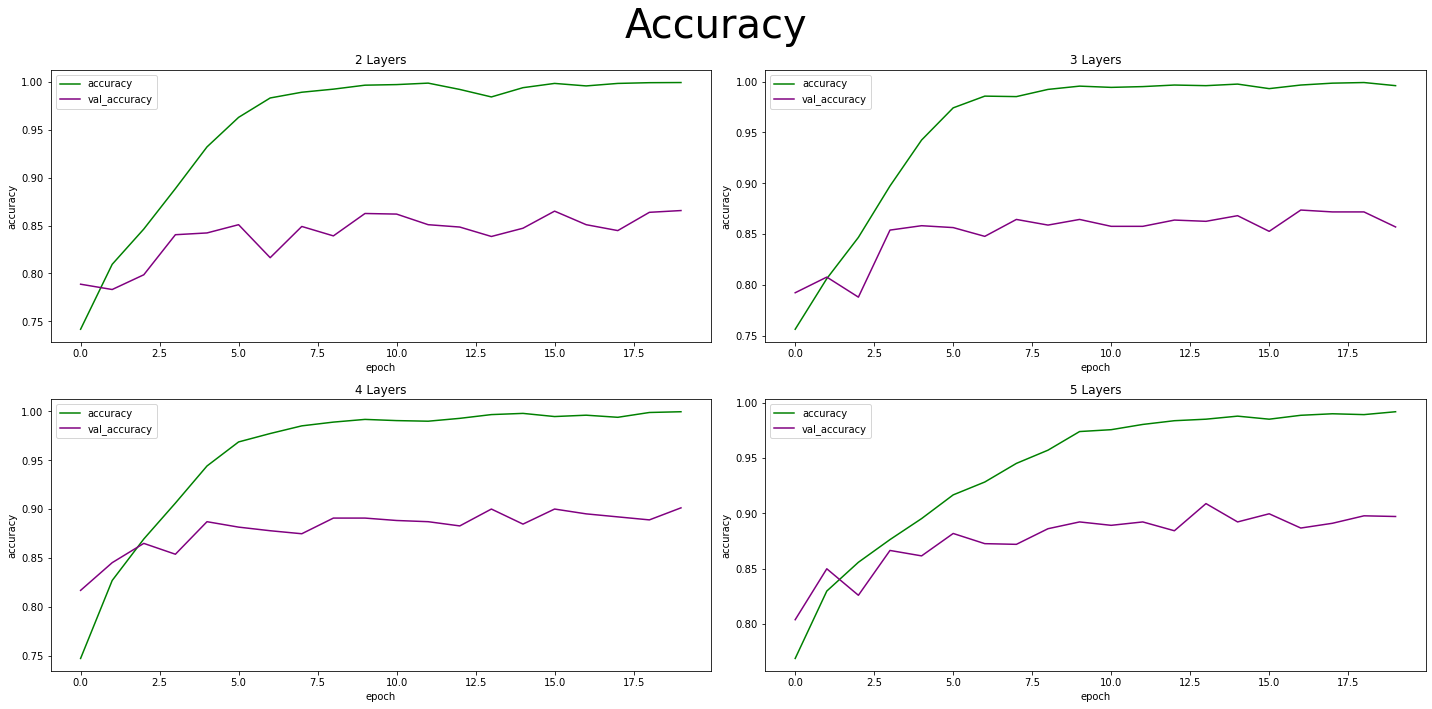

In [43]:
fig, axs = plt.subplots(2, 2, figsize=(20, 10))
fig.suptitle('Accuracy', fontsize=40)
axs[0, 0].plot(hist_2.history['accuracy'], color='green', label='accuracy')
axs[0, 0].plot(hist_2.history['val_accuracy'], color='purple', label='val_accuracy')
axs[0, 0].legend(loc="upper left")
axs[0, 0].set_title('2 Layers')
axs[0, 1].plot(hist_3.history['accuracy'], color='green', label='accuracy')
axs[0, 1].plot(hist_3.history['val_accuracy'], color='purple', label='val_accuracy')
axs[0, 1].legend(loc="upper left")
axs[0, 1].set_title('3 Layers')
axs[1, 0].plot(hist_4.history['accuracy'], color='green', label='accuracy')
axs[1, 0].plot(hist_4.history['val_accuracy'], color='purple', label='val_accuracy')
axs[1, 0].legend(loc="upper left")
axs[1, 0].set_title('4 Layers')
axs[1, 1].plot(hist_5.history['accuracy'], color='green', label='accuracy')
axs[1, 1].plot(hist_5.history['val_accuracy'], color='purple', label='val_accuracy')
axs[1, 1].legend(loc="upper left")
axs[1, 1].set_title('5 Layers')

for ax in axs.flat:
    ax.set(xlabel='epoch', ylabel='accuracy')


fig.tight_layout()


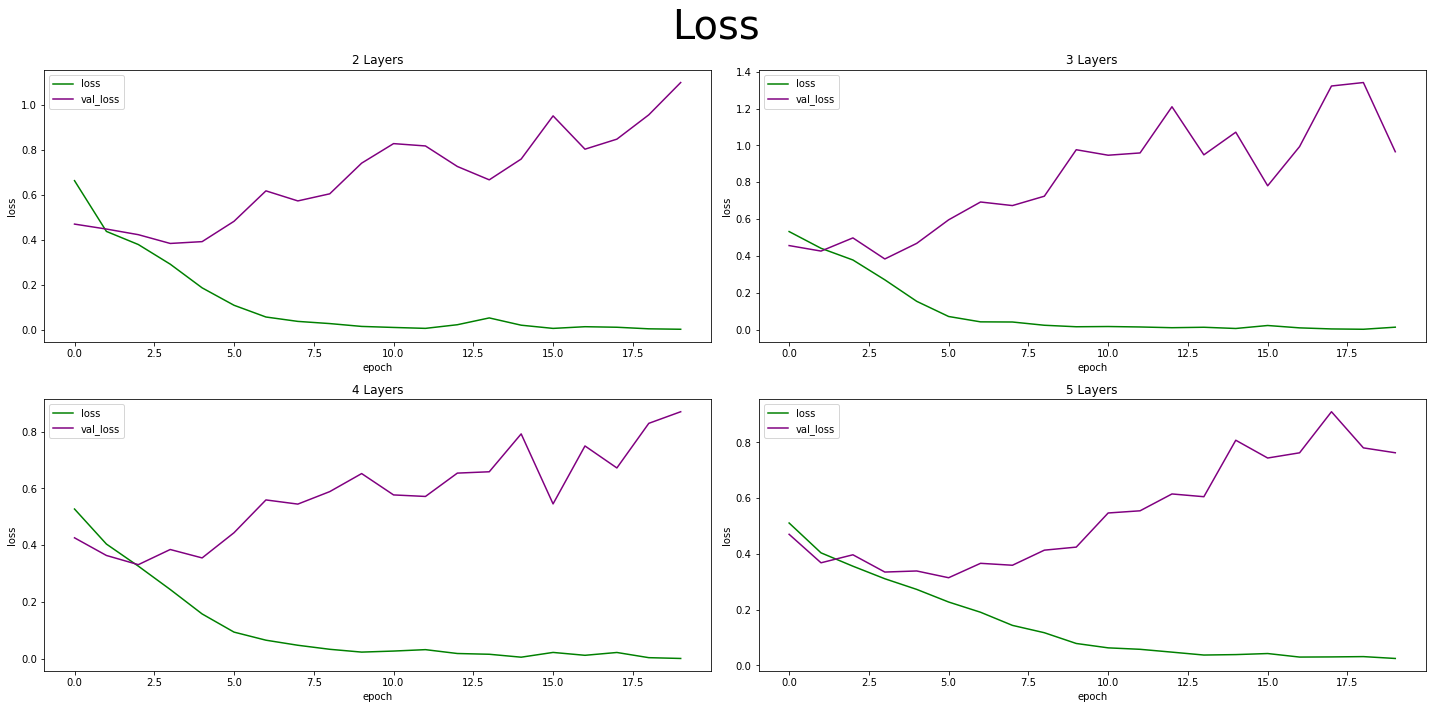

In [44]:
fig, axs = plt.subplots(2, 2, figsize=(20, 10))
fig.suptitle('Loss', fontsize=40)
axs[0, 0].plot(hist_2.history['loss'], color='green', label='loss')
axs[0, 0].plot(hist_2.history['val_loss'], color='purple', label='val_loss')
axs[0, 0].legend(loc="upper left")
axs[0, 0].set_title('2 Layers')
axs[0, 1].plot(hist_3.history['loss'], color='green', label='loss')
axs[0, 1].plot(hist_3.history['val_loss'], color='purple', label='val_loss')
axs[0, 1].legend(loc="upper left")
axs[0, 1].set_title('3 Layers')
axs[1, 0].plot(hist_4.history['loss'], color='green', label='loss')
axs[1, 0].plot(hist_4.history['val_loss'], color='purple', label='val_loss')
axs[1, 0].legend(loc="upper left")
axs[1, 0].set_title('4 Layers')
axs[1, 1].plot(hist_5.history['loss'], color='green', label='loss')
axs[1, 1].plot(hist_5.history['val_loss'], color='purple', label='val_loss')
axs[1, 1].legend(loc="upper left")
axs[1, 1].set_title('5 Layers')

for ax in axs.flat:
    ax.set(xlabel='epoch', ylabel='loss')


fig.tight_layout()

### Creating another model using Softmax activation

In [45]:
mod_smx = Sequential()

mod_smx.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
mod_smx.add(MaxPooling2D())

mod_smx.add(Conv2D(16, (3,3), 1, activation='relu'))
mod_smx.add(MaxPooling2D())

mod_smx.add(Conv2D(32, (3,3), 1, activation='relu'))
mod_smx.add(MaxPooling2D())

mod_smx.add(Conv2D(32, (3,3), 1, activation='relu'))
mod_smx.add(MaxPooling2D())

mod_smx.add(Conv2D(16, (3,3), 1, activation='relu'))
mod_smx.add(MaxPooling2D())

mod_smx.add(Flatten())

mod_smx.add(Dense(256, activation='relu'))
mod_smx.add(Dense(1, activation='softmax'))

In [46]:
mod_smx.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [47]:
mod_smx.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 127, 127, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 125, 125, 16)      2320      
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 62, 62, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 60, 60, 32)        4640      
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 30, 30, 32)      

### Another model using SVM

In [48]:
mod_svm = Sequential()

mod_svm.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
mod_svm.add(MaxPooling2D())

mod_svm.add(Conv2D(16, (3,3), 1, activation='relu'))
mod_svm.add(MaxPooling2D())

mod_svm.add(Conv2D(32, (3,3), 1, activation='relu'))
mod_svm.add(MaxPooling2D())

mod_svm.add(Conv2D(32, (3,3), 1, activation='relu'))
mod_svm.add(MaxPooling2D())

mod_svm.add(Conv2D(16, (3,3), 1, activation='relu'))
mod_svm.add(MaxPooling2D())

mod_svm.add(Flatten())

mod_svm.add(Dense(256, activation='relu'))
mod_svm.add(Dense(1, kernel_regularizer=tf.keras.regularizers.l2(0.01), activation ='linear'))

In [49]:
mod_svm.compile(optimizer = 'adam', loss = 'hinge', metrics = ['accuracy'])

In [50]:
mod_svm.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 127, 127, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 125, 125, 16)      2320      
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 62, 62, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 60, 60, 32)        4640      
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 30, 30, 32)      

#### Training the new models

In [51]:
hist_smx = mod_smx.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
407/407 [==============================] - 112s 272ms/step - loss: 0.5140 - accuracy: 0.3862 - val_loss: 0.4110 - val_accuracy: 0.4076
Epoch 2/20
407/407 [==============================] - 109s 268ms/step - loss: 0.3933 - accuracy: 0.3862 - val_loss: 0.3658 - val_accuracy: 0.4002
Epoch 3/20
407/407 [==============================] - 114s 279ms/step - loss: 0.3429 - accuracy: 0.3867 - val_loss: 0.3232 - val_accuracy: 0.4052
Epoch 4/20
407/407 [==============================] - 112s 275ms/step - loss: 0.2917 - accuracy: 0.3861 - val_loss: 0.2876 - val_accuracy: 0.4033
Epoch 5/20
407/407 [==============================] - 115s 282ms/step - loss: 0.2483 - accuracy: 0.3859 - val_loss: 0.2857 - val_accuracy: 0.4009
Epoch 6/20
407/407 [==============================] - 115s 282ms/step - loss: 0.2022 - accuracy: 0.3867 - val_loss: 0.2632 - val_accuracy: 0.4046
Epoch 7/20
407/407 [==============================] - 117s 288ms/step - loss: 0.1618 - accuracy: 0.3870 - val_loss: 0.2852 -

In [52]:
hist_svm = mod_svm.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
407/407 [==============================] - 107s 260ms/step - loss: 0.5911 - accuracy: 0.7300 - val_loss: 0.4651 - val_accuracy: 0.7765
Epoch 2/20
407/407 [==============================] - 105s 257ms/step - loss: 0.4095 - accuracy: 0.8173 - val_loss: 0.4035 - val_accuracy: 0.7986
Epoch 3/20
407/407 [==============================] - 105s 257ms/step - loss: 0.3652 - accuracy: 0.8342 - val_loss: 0.3668 - val_accuracy: 0.8294
Epoch 4/20
407/407 [==============================] - 114s 280ms/step - loss: 0.3182 - accuracy: 0.8569 - val_loss: 0.3435 - val_accuracy: 0.8510
Epoch 5/20
407/407 [==============================] - 109s 269ms/step - loss: 0.2730 - accuracy: 0.8810 - val_loss: 0.3021 - val_accuracy: 0.8762
Epoch 6/20
407/407 [==============================] - 104s 255ms/step - loss: 0.2216 - accuracy: 0.9034 - val_loss: 0.3029 - val_accuracy: 0.8966
Epoch 7/20
407/407 [==============================] - 103s 254ms/step - loss: 0.2027 - accuracy: 0.9126 - val_loss: 0.2578 -

### Visualising Model Performance

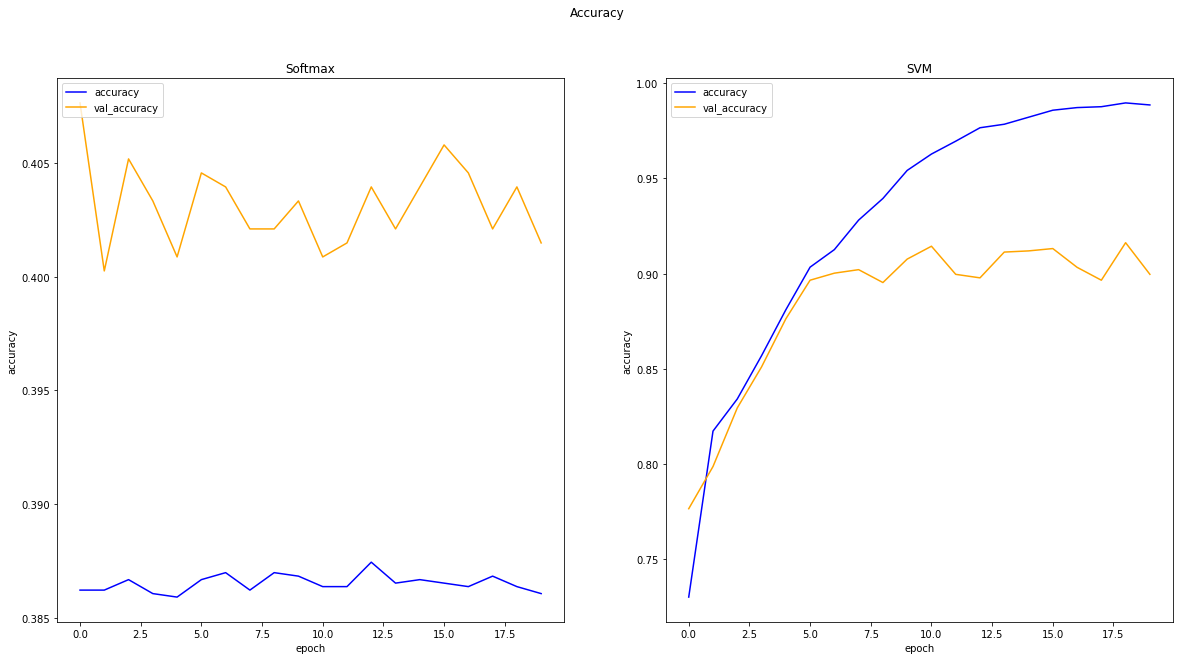

In [53]:
fig, axs = plt.subplots(1, 2, figsize=(20, 10))
fig.suptitle('Accuracy')
axs[0].plot(hist_smx.history['accuracy'], color='blue', label='accuracy')
axs[0].plot(hist_smx.history['val_accuracy'], color='orange', label='val_accuracy')
axs[0].legend(loc="upper left")
axs[0].set_title('Softmax')
axs[1].plot(hist_svm.history['accuracy'], color='blue', label='accuracy')
axs[1].plot(hist_svm.history['val_accuracy'], color='orange', label='val_accuracy')
axs[1].legend(loc="upper left")
axs[1].set_title('SVM')

for ax in axs.flat:
    ax.set(xlabel='epoch', ylabel='accuracy')


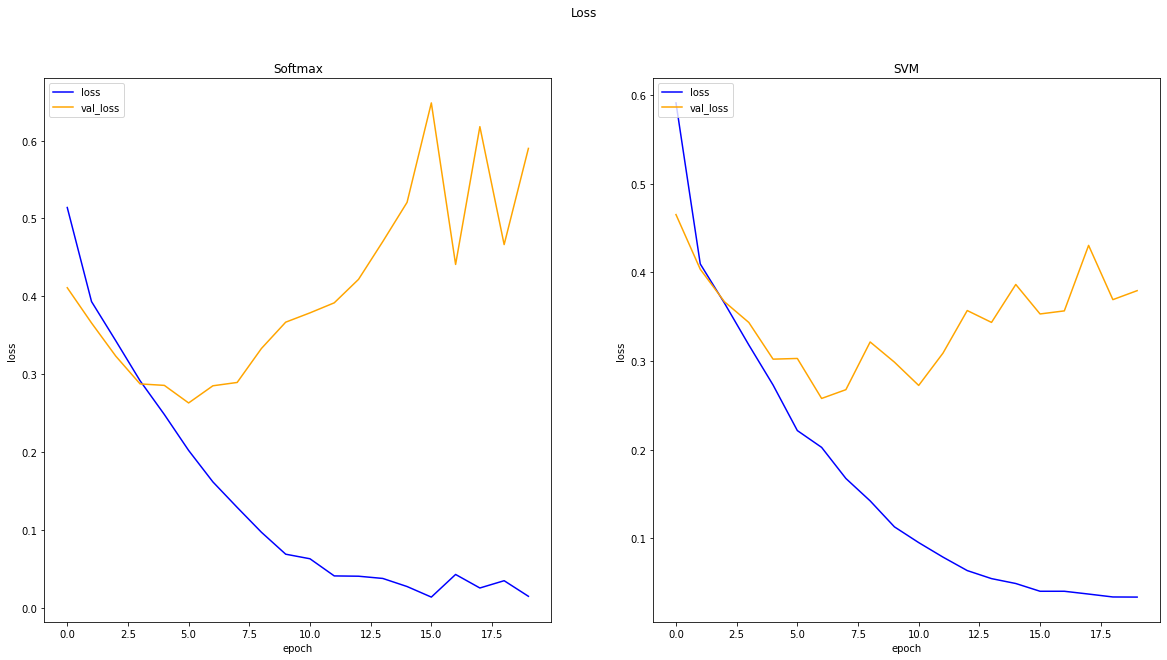

In [97]:
fig, axs = plt.subplots(1, 2, figsize=(20, 10))
fig.suptitle('Loss')
axs[0].plot(hist_smx.history['loss'], color='blue', label='loss')
axs[0].plot(hist_smx.history['val_loss'], color='orange', label='val_loss')
axs[0].legend(loc="upper left")
axs[0].set_title('Softmax')
axs[1].plot(hist_svm.history['loss'], color='blue', label='loss')
axs[1].plot(hist_svm.history['val_loss'], color='orange', label='val_loss')
axs[1].legend(loc="upper left")
axs[1].set_title('SVM')

for ax in axs.flat:
    ax.set(xlabel='epoch', ylabel='loss')


### Adding a dropout layer

In [126]:
mod_5d = Sequential()

mod_5d.add(data_augmentation)

mod_5d.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
mod_5d.add(MaxPooling2D())

mod_5d.add(Conv2D(16, (3,3), 1, activation='relu'))
mod_5d.add(MaxPooling2D())

mod_5d.add(Conv2D(32, (3,3), 1, activation='relu'))
mod_5d.add(MaxPooling2D())

mod_5d.add(Conv2D(32, (3,3), 1, activation='relu'))
mod_5d.add(MaxPooling2D())

mod_5d.add(Conv2D(16, (3,3), 1, activation='relu'))
mod_5d.add(MaxPooling2D())

mod_5d.add(Dropout(0.2))

mod_5d.add(Flatten())

mod_5d.add(Dense(256, activation='relu'))
mod_5d.add(Dense(1, activation='sigmoid'))

In [127]:
mod_5d.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [188]:
mod_5d.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_6 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 conv2d_24 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 127, 127, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 125, 125, 16)      2320      
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 62, 62, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 60, 60, 32)       

In [129]:
hist_5d = mod_5d.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
407/407 [==============================] - 132s 307ms/step - loss: 0.5740 - accuracy: 0.7127 - val_loss: 0.4319 - val_accuracy: 0.8177
Epoch 2/20
407/407 [==============================] - 121s 296ms/step - loss: 0.4549 - accuracy: 0.8041 - val_loss: 0.4180 - val_accuracy: 0.8183
Epoch 3/20
407/407 [==============================] - 120s 294ms/step - loss: 0.4241 - accuracy: 0.8188 - val_loss: 0.3680 - val_accuracy: 0.8528
Epoch 4/20
407/407 [==============================] - 135s 332ms/step - loss: 0.3969 - accuracy: 0.8363 - val_loss: 0.3783 - val_accuracy: 0.8516
Epoch 5/20
407/407 [==============================] - 118s 289ms/step - loss: 0.3777 - accuracy: 0.8426 - val_loss: 0.3591 - val_accuracy: 0.8473
Epoch 6/20
407/407 [==============================] - 118s 289ms/step - loss: 0.3606 - accuracy: 0.8557 - val_loss: 0.3213 - val_accuracy: 0.8824
Epoch 7/20
407/407 [==============================] - 118s 291ms/step - loss: 0.3412 - accuracy: 0.8667 - val_loss: 0.3250 -

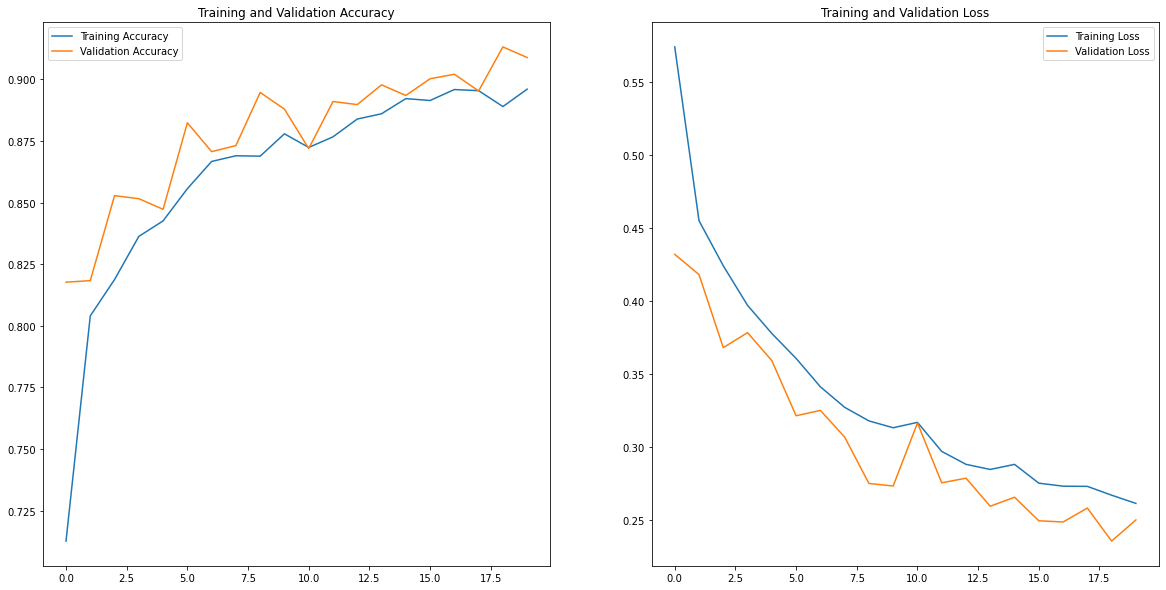

In [187]:
acc = hist_5d.history['accuracy']
val_acc = hist_5d.history['val_accuracy']

loss = hist_5d.history['loss']
val_loss = hist_5d.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='upper left')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


### Evaluating the model

In [54]:
import pandas as pd

from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [55]:
test_dir = 'data/test'

In [158]:
test = tf.keras.utils.image_dataset_from_directory(test_dir, batch_size=688)

Found 2064 files belonging to 2 classes.


In [159]:
test_iterator = test.as_numpy_iterator()

In [160]:
test_batch = test_iterator.next()

In [161]:
test_batch[0].shape

(688, 256, 256, 3)

In [162]:
pre = Precision()
re = Recall()
biacc = BinaryAccuracy()

In [163]:
for test_batch in test.as_numpy_iterator(): 
    X, y = test_batch
    yhat = mod_5.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    biacc.update_state(y, yhat)

In [164]:
print(f'Precision: {pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{biacc.result().numpy()}')

Precision: 0.7634173035621643, Recall:0.8387485146522522, Accuracy:0.8304263949394226


In [165]:
yhat.shape

(688, 1)

In [166]:
yhat

array([[1.00000000e+00],
       [1.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [1.00000000e+00],
       [0.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [0.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [2.07206578e-15],
       [1.00000000e+00],
       [0.00000000e+00],
       [1.00000000e+00],
       [0.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [0.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [1.00000000e+00],


In [168]:
y

array([1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,

In [169]:
y.shape

(688,)

In [170]:
thresh = 0.5

yhat_binary = np.where(yhat > thresh, 1, 0)

In [171]:
yhat_binary

array([[1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
    

In [172]:
yy = yhat_binary.reshape(688)
yy.shape

(688,)

In [173]:
yy

array([1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,

In [174]:
df = pandas.DataFrame({"True": y, "Pred": yy})
print(df)

     True  Pred
0       1     1
1       0     1
2       0     0
3       0     0
4       1     1
..    ...   ...
683     0     0
684     1     1
685     0     0
686     1     1
687     1     1

[688 rows x 2 columns]


In [175]:
cm = confusion_matrix(y, yy)

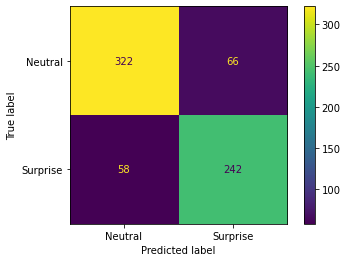

In [176]:
from sklearn import metrics

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Neutral', 'Surprise'])

cm_display.plot()
plt.show()

In [177]:
from sklearn.metrics import roc_curve, auc

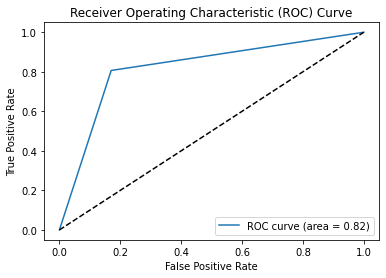

In [178]:
fpr, tpr, thresholds = roc_curve(y, yy)

# Computing the AUC score
roc_auc = auc(fpr, tpr)

#Plotting the ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

### Image Prediction

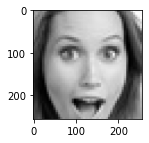

In [179]:
from tensorflow.keras.preprocessing import image

test_image = image.load_img('data/test/surprise/PrivateTest_2264189.jpg', target_size = (256,256))
plt.figure(figsize=(2, 2))
plt.imshow(test_image);

In [180]:
test_image = image.img_to_array(test_image)
test_image = test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = mod_5.predict(test_image)
result

array([[1.]], dtype=float32)

In [181]:
rr = result.reshape(1)
sup_conf = round(rr[0] * 100, 2)
neut_conf = round(100-(rr[0] * 100), 2)

print(f'Emotion prediction\n\nSurprise: {sup_conf}%\nNeutral: {neut_conf}%')

Emotion prediction

Surprise: 100.0%
Neutral: 0.0%


In [182]:
if result < 0.5: 
    print(f'Predicted class is Neutral')
else:
    print(f'Predicted class is Surprise')

Predicted class is Surprise


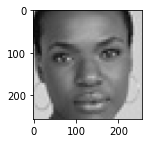

In [183]:
test_image2 = image.load_img('data/test/neutral/PrivateTest_6658003.jpg', target_size = (256,256))
plt.figure(figsize=(2, 2))
plt.imshow(test_image2);

In [184]:
test_image2 = image.img_to_array(test_image2)
test_image2 = test_image2/255
test_image2 = np.expand_dims(test_image2, axis = 0)
result2 = mod_5.predict(test_image2)
result2

array([[0.0001604]], dtype=float32)

In [185]:
rr2 = result2.reshape(1)
sup_conf2 = round(rr2[0] * 100, 2)
neut_conf2 = round(100-(rr2[0] * 100), 2)

print(f'Emotion prediction\n\nSuprise: {sup_conf2}%\nNeutral: {neut_conf2}%')

Emotion prediction

Suprise: 0.02%
Neutral: 99.98%


In [186]:
if result2 < 0.5: 
    print(f'Predicted class is Neutral')
else:
    print(f'Predicted class is Surprise')

Predicted class is Neutral


## Conclusion

Out of the six image classifiers developed for this project, the models trained for the suprise-neutral emotions has the best performance. With an accuracy score of 83% it was able to predict the emotions on the test images with a high confidence probability. The dataset was not as balanced as that of the disgust-neutral classifier or the fear-neutral classifier, but its performance is much better. This may be as a result of a more expressive facial expression compared to the other emotions as the features of the face are more enhanced when expressing surprise. This suggests that incorporating more data with enhanced facial features for other emotions could improve the performance of the classifiers for those emotions.